
**Experiment Name** : Designing a Minimum Distance to Class Mean Classifier
**Student Name**    : Istiak Ahmed


In [ ]:
#read train data set 
import numpy as np 
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train.txt'] ), sep=" " ,  header = None)
print(df)


Saving train.txt to train.txt
     0   1  2
0    2   2  1
1    3   1  1
2   -4   3  2
3    3   3  1
4   -1  -3  1
5    2   6  2
6    4   2  1
7   -2  -2  1
8    0   0  2
9   -2   2  2
10  -1  -1  2
11  -4   2  2


In [ ]:
#convertion to numpy from dataframe of pd 
training_set = df.to_numpy()
k = 0
j=0
w1=np.zeros((2,6))
#print (w1)
w2=np.zeros((2,7))
#print (w2)
# splitting the (x,y) into w1 and w2 for both clsses 1 and 2 
for i in range (len(training_set)):
  if  training_set[i][2] ==1 :
    w1[0][k]=training_set[i][0]
    w1[1][k]= training_set[i][1]
    k=k+1

  else :
    w2[0][j]=training_set[i][0]
    w2[1][j]= training_set[i][1]
    j=j+1

print (w1)  
print (w2)  






[[ 2.  3.  3. -1.  4. -2.]
 [ 2.  1.  3. -3.  2. -2.]]
[[-4.  2.  0. -2. -1. -4.  0.]
 [ 3.  6.  0.  2. -1.  2.  0.]]


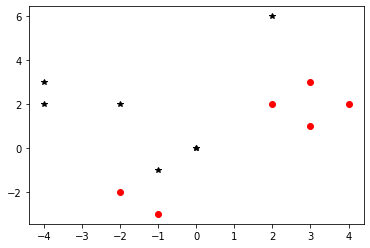

In [ ]:
#plot 2 classes train data
import matplotlib.pyplot as plt
plt.plot(w1[0],w1[1], 'ro')
plt.plot(w2[0],w2[1], 'k*')



mean of w1, axis = 1 :  [1.5 0.5]

mean of w2, axis = 1 :  [-1.28571429  1.71428571]


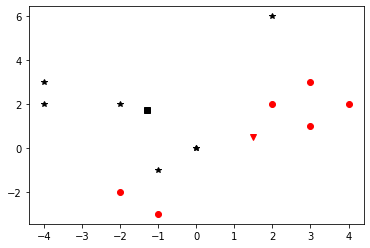

In [ ]:
#calculating mean of two classes
print("\nmean of w1, axis = 1 : ", np.mean(w1, axis = 1)) 
print("\nmean of w2, axis = 1 : ", np.mean(w2, axis = 1))
w1m=np.mean(w1, axis = 1)
w2m=np.mean(w2, axis = 1)
#plotting the output
plt.plot(w1[0],w1[1], 'ro')
plt.plot(w2[0],w2[1], 'k*')
plt.plot(w1m[0],w1m[1], 'rv')
plt.plot(w2m[0],w2m[1], 'ks')


In [ ]:
#uploading the test data and convert to np array
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['test.txt'] ), sep=" " ,  header = None, dtype = 'Int64')
#print(df2)




Saving test.txt to test.txt


In [ ]:
testing_set = df2.to_numpy()
print(testing_set)


[[-1 -5 1]
 [3 2 1]
 [-2 1 2]
 [8 2 1]
 [6 -1 1]
 [0 2 1]
 [-3 0 2]]


6


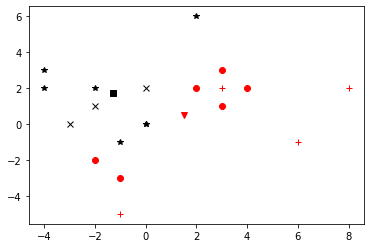

In [ ]:
#calculating linear discriminate function 
list1x=[]
list1y=[]
list2x=[]
list2y=[]
count=0;
new=[]
t=w1m[0]*w1m[0]
t1=w1m[1]*w1m[1]
t2=w2m[0]*w2m[0]
t3=w2m[1]*w2m[1]
for i in range(7):
  g1 = (testing_set[i][0]*w1m[0]+testing_set[i][1]*w1m[1]) - 0.5*(t+t1)
  #print(g1)
  g2 = (testing_set[i][0]*w2m[0]+testing_set[i][1]*w2m[1]) - 0.5*(t2+t3)
  #print(g2)
  if g1>g2 :
    list1x.append(testing_set[i][0])
    list1y.append(testing_set[i][1])
    new.append ([testing_set[i][0],testing_set[i][0],1])
    if testing_set[i][2]==1:
      count=count+1
  else : 
    list2x.append(testing_set[i][0])
    list2y.append(testing_set[i][1])
    new.append ([testing_set[i][0],testing_set[i][0],2])
    if testing_set[i][2]==2:
      count=count+1
print(count)
#print(list1x)
#print(list1y)
#print(list2x)
#print(list2y)  
#plotting the new comers   
plt.plot(w1[0],w1[1], 'ro')
plt.plot(w2[0],w2[1], 'k*')
plt.plot(w1m[0],w1m[1], 'rv')
plt.plot(w2m[0],w2m[1], 'ks')

plt.plot(list1x,list1y, 'r+')
plt.plot(list2x,list2y,'kx')






In [ ]:
# desigining the db and the final output 
coef=w1m-w2m
#print(coef)
y=[]
constant = -0.5* ((t+t1)-(t2+t3))
#print (constant)
b=np.arange(-4, 8, 2)
print(b)
for i in range (6):
  temp= -((coef[0]* b[i] + constant)/coef[1])
  y.append(temp)
print (y)


[-4 -2  0  2  4  6]
[-8.315126050420169, -3.726890756302521, 0.8613445378151263, 5.449579831932773, 10.03781512605042, 14.626050420168069]


Accuracy : 85.71428571428571


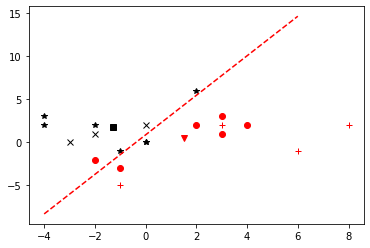

In [ ]:
plt.plot(w1[0],w1[1], 'ro')
plt.plot(w2[0],w2[1], 'k*')
plt.plot(w1m[0],w1m[1], 'rv')
plt.plot(w2m[0],w2m[1], 'ks')

plt.plot(list1x,list1y, 'r+')
plt.plot(list2x,list2y,'kx')
plt.plot(b,y,'r--')

acuracy=(count/len(testing_set)) * 100
print ("Accuracy :" ,acuracy)